In [1]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

sys.path.append('../src/features')
import build_features as bf

In [3]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [4]:
targets = pd.DataFrame(originalDF.TARGET.value_counts())

In [5]:
targets['Pct'] = targets['TARGET']/targets['TARGET'].sum()

In [6]:
targets

,TARGET,Pct
0,282686,0.919271
1,24825,0.080729


In [6]:
descriptionsDF = pd.read_csv("../reports/HomeCredit_columns_description.csv")

In [7]:
descriptionsDF[descriptionsDF['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [65]:
correlationsDF = originalDF.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlationsDF.tail(10))
print('\nMost Negative Correlations:\n', correlationsDF.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [9]:
import seaborn as sns

## Clean up AMT_Income_Total

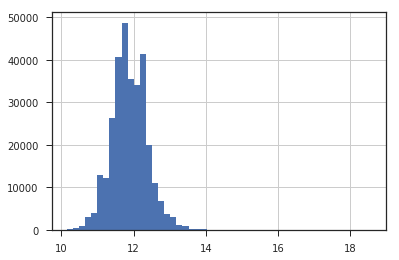

In [11]:
np.log(originalDF['AMT_INCOME_TOTAL']).hist(bins = 50)

In [15]:
amtMean = np.log(originalDF['AMT_INCOME_TOTAL']).mean()
amtStd = np.log(originalDF['AMT_INCOME_TOTAL']).std()

In [16]:
amtMean

11.909237775371254

In [17]:
amtStd

0.48891007919920987

In [ ]:
amt

In [18]:
from sklearn import preprocessing

In [37]:
X_scaled = preprocessing.scale(np.log(originalDF['AMT_INCOME_TOTAL']))

In [42]:
logAMT = pd.Series((np.log(originalDF['AMT_INCOME_TOTAL']) - amtMean)/amtStd)
scaledAMT = pd.Series(X_scaled, name= 'scaledLogINC')

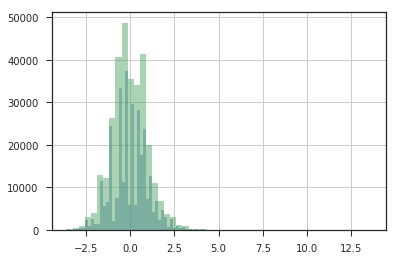

In [44]:
logAMT.hist(bins = 100, alpha = 0.5)
scaledAMT.hist(bins = 50, alpha = 0.5)
plt.legend = True

In [64]:
def normalizeIncome(dfIn):
    """Log transform income and standardize income"""
    nIncome = np.log(dfIn['AMT_INCOME_TOTAL'])
    nIncome.rename('logAMT_INCOME', inplace = True)
    nMean = dfIn['AMT_INCOME_TOTAL'].mean() ## Finds mean
    nStd = dfIn['AMT_INCOME_TOTAL'].std() ## Finds standard deviation
    nIncome = (nIncome - nMean)/nStd ## Standardization
    dfIn = pd.concat([dfIn, nIncome], axis = 1)
    return dfIn

In [47]:
def standardizedIncome(dfIn, dfOut):
    nIncome = pd.Series(preprocessing.scale(np.log(dfIn['AMT_INCOME_TOTAL'])), name = 'scaledLogInc')
    dfOut = pd.concat([dfOut, nIncome], axis = 1)
    return dfOut

In [48]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [50]:
scaledAMT = standardizedIncome(originalDF, scaledAMT)

scaledAMT ## Works

## Number of Children

In [54]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [56]:
originalDF['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

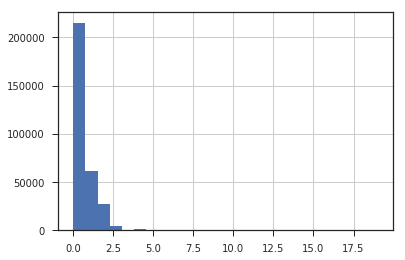

In [72]:
originalDF['CNT_CHILDREN'].hist(bins = 25)

## Days Employeed

In [295]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [296]:
print(descriptionsDF[descriptionsDF['Row'] == 'DAYS_EMPLOYED']['Description'][18])

How many days before the application the person started current employment


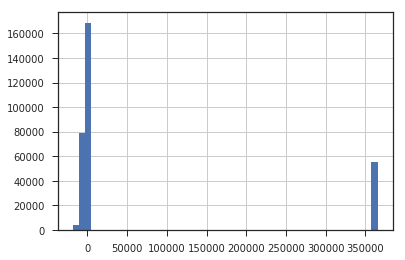

In [297]:
originalDF['DAYS_EMPLOYED'].hist(bins = 50)

In [298]:
originalDF['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [299]:
anom = originalDF[originalDF['DAYS_EMPLOYED'] == 365243]
non_anom = originalDF[originalDF['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on {:3.2f} of loans'.format(100 * non_anom['TARGET'].mean()))
print('The anomalies default on {:3.2f} of loans'.format(100 * anom['TARGET'].mean()))
print('There are {:d} anomalous days of employment'.format(len(anom)))

The non-anomalies default on 8.66 of loans
The anomalies default on 5.40 of loans
There are 55374 anomalous days of employment


In [300]:
originalDF['DAYS_EMPLOYED_ANOM'] = originalDF["DAYS_EMPLOYED"] == 365243

In [301]:
originalDF['DAYS_EMPLOYED_ANOM'].describe()

count     307511
unique         2
top        False
freq      252137
Name: DAYS_EMPLOYED_ANOM, dtype: object

In [302]:
originalDF['DAYS_EMPLOYED_ZERO'] = originalDF["DAYS_EMPLOYED"] == 0

In [303]:
originalDF['DAYS_EMPLOYED_ANOM'].describe()

count     307511
unique         2
top        False
freq      252137
Name: DAYS_EMPLOYED_ANOM, dtype: object

In [304]:
## Create a flag column
originalDF['DAYS_EMPLOYED_ANOM'] = originalDF["DAYS_EMPLOYED"] == 365243
originalDF['DAYS_EMPLOYED_ZERO'] = originalDF["DAYS_EMPLOYED"] == 0
originalDF['DAYS_EMPLOYED'].replace({0: np.nan}, inplace = True)
originalDF['DAYS_EMPLOYED'] = (originalDF['DAYS_EMPLOYED'] * (-1)).apply(np.log)
originalDF['DAYS_EMPLOYED'].replace({np.log(365243): np.nan}, inplace = True)
#originalDF['DAYS_EMPLOYED'] = originalDF['DAYS_EMPLOYED'].fillna(originalDF['DAYS_EMPLOYED'].mean())


In [305]:
originalDF['DAYS_EMPLOYED'].describe()

count    252135.000000
mean          7.301769
std           1.058523
min           0.000000
25%           6.642487
50%           7.407318
75%           8.063063
max           9.793226
Name: DAYS_EMPLOYED, dtype: float64

In [306]:
originalDF['DAYS_EMPLOYED'] = originalDF['DAYS_EMPLOYED'].fillna(originalDF['DAYS_EMPLOYED'].mean())

In [307]:
originalDF['DAYS_EMPLOYED'].describe()

count    307511.000000
mean          7.301769
std           0.958488
min           0.000000
25%           6.838405
50%           7.301769
75%           7.922986
max           9.793226
Name: DAYS_EMPLOYED, dtype: float64

In [308]:
originalDF['DAYS_EMPLOYED'] = preprocessing.scale(originalDF['DAYS_EMPLOYED'])

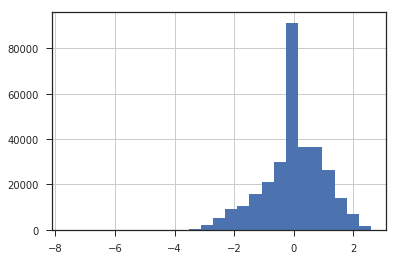

In [309]:
originalDF['DAYS_EMPLOYED'].hist(bins = 25);

In [321]:
from sklearn.preprocessing import Imputer

In [325]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [339]:
testdf = pd.DataFrame(originalDF['DAYS_EMPLOYED'])

In [340]:
testdf

,DAYS_EMPLOYED
0,-637
1,-1188
2,-225
3,-3039
4,-3038
5,-1588
6,-3130
7,-449
8,365243
9,-2019


In [341]:
def engineerDays(dfIn, dfOut):
    '''DAYS_EMPLOYEED is from when employment starts. Data is positively skewed. 
    Need to log transform. Added flag columns for the anomly in data and people who have no job (only 2 in train set) .'''
    
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    
    dfOut['DAYS_EMPLOYED_ANOM'] = dfIn["DAYS_EMPLOYED"] == 365243
    dfOut['DAYS_EMPLOYED_ZERO'] = dfIn["DAYS_EMPLOYED"] == 0
    dfOut['DAYS_EMPLOYED'] = dfIn['DAYS_EMPLOYED'].replace({0: np.nan})
    dfOut['DAYS_EMPLOYED'] = (dfOut['DAYS_EMPLOYED'] * (-1)).apply(np.log)
    dfOut['DAYS_EMPLOYED'] = dfOut['DAYS_EMPLOYED'].replace({np.log(365243): np.nan})
    dfOut['DAYS_EMPLOYED'] = dfOut['DAYS_EMPLOYED'].fillna(dfOut['DAYS_EMPLOYED'].mean())
    dfOut['DAYS_EMPLOYED'] = preprocessing.scale(dfOut['DAYS_EMPLOYED'])
    
    return dfOut

In [342]:
testdf = engineerDays(originalDF,testdf)

In [343]:
testdf['DAYS_EMPLOYED_ANOM'].describe()

count     307511
unique         2
top        False
freq      252137
Name: DAYS_EMPLOYED_ANOM, dtype: object

In [344]:
testdf.head()

,DAYS_EMPLOYED,DAYS_EMPLOYED_ANOM,DAYS_EMPLOYED_ZERO
0,-0.881598,False,False
1,-0.231346,False,False
2,-1.967340,False,False
3,0.748592,False,False
4,0.748249,False,False


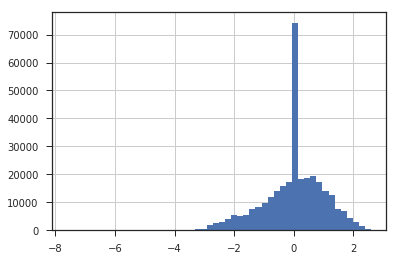

In [345]:
testdf['DAYS_EMPLOYED'].hist(bins = 50)

### Find NaNs

In [14]:
def missingValues(df):
    
        # Total missing values
        missVal = df.isnull().sum()
        
        # Percentage of missing values
        missValPct = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        missValTable = pd.concat([missVal, missValPct], axis=1)
        
        # Rename the columns
        missValTableNewCol = missValTable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        missValTableNewCol = missValTableNewCol[
            missValTableNewCol.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missValTableNewCol.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return missValTableNewCol

In [15]:
missingValues(originalDF)

Your selected dataset has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Check Encoders

In [2]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [3]:
newDF = pd.DataFrame(originalDF["TARGET"])

In [4]:
newDF = bf.createEncoders(originalDF, newDF)

3 columns were label encoded


In [5]:
newDF.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,1,0,0,1
1,0,0,0,0
2,0,1,1,1
3,0,0,0,1
4,0,0,0,1


In [9]:
descriptionsDF[descriptionsDF['Row'] == 'NAME_CONTRACT_TYPE']

,Unnamed: 0,Table,Row,Description,Special
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
175,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN


In [16]:
print("Number of values: {}".format(originalDF['NAME_CONTRACT_TYPE'].count()))
originalDF['NAME_CONTRACT_TYPE'].head()

Number of values: 307511


0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object

In [17]:
print("Number of values: {}".format(originalDF['FLAG_OWN_CAR'].count()))
originalDF['FLAG_OWN_CAR'].head()

Number of values: 307511


0    N
1    N
2    Y
3    N
4    N
Name: FLAG_OWN_CAR, dtype: object

### Add more features

In [46]:
from sklearn.preprocessing import scale

In [24]:
descriptionsDF[descriptionsDF['Row'] == 'AMT_ANNUITY']

,Unnamed: 0,Table,Row,Description,Special
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
138,141,bureau.csv,AMT_ANNUITY,Annuity of the Credit Bureau credit,NaN
176,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN


In [25]:
descriptionsDF[descriptionsDF['Row'] == 'AMT_CREDIT']

,Unnamed: 0,Table,Row,Description,Special
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
178,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN


In [33]:
originalDF['AMT_INCOME_TOTAL'].count()

307511

In [55]:
def makeCreditIncome(dfIn, dfOut):
    creditIncome = dfIn['AMT_CREDIT'] / dfIn['AMT_INCOME_TOTAL']
    creditIncome = pd.Series(np.log(creditIncome.fillna(creditIncome.median())), name='creditIncome')
    dfOut = pd.concat([dfOut, creditIncome], axis=1)
    return dfOut

In [57]:
newDF = makeCreditIncome(originalDF, newDF)

In [58]:
newDF.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,creditIncome
0,1,0,0,1,2.007889,0.121978,0.060749,-0.067329,0.697084
1,0,0,0,0,4.790750,0.132217,0.027598,-0.070862,1.566687
2,0,1,1,1,2.000000,0.100000,0.050000,-0.011814,0.693147
3,0,0,0,1,2.316167,0.219900,0.094941,-0.159905,0.839914
4,0,0,0,1,4.222222,0.179963,0.042623,-0.152418,1.440362


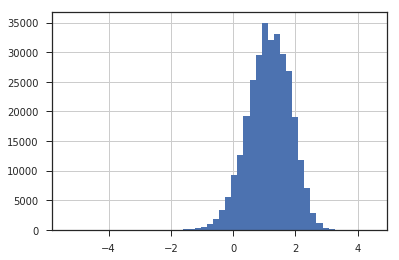

In [62]:
newDF['creditIncome'].hist(bins = 50)

In [34]:
originalDF['AMT_CREDIT'].count()

307511

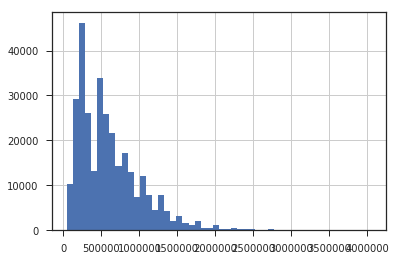

In [35]:
originalDF['AMT_CREDIT'].hist(bins = 50)

In [63]:
def makeCreditIncome(dfIn, dfOut):
    annuityIncomePct = originalDF['AMT_ANNUITY'] / originalDF['AMT_INCOME_TOTAL']
    annuityIncomePct = pd.Series(np.log(annuityIncomePct.fillna(annuityIncomePct.median())), name='annuityIncomePct')
    dfOut = pd.concat([dfOut, annuityIncomePct], axis=1)
    return dfOut

In [64]:
newDF = makeCreditIncome(originalDF, newDF)

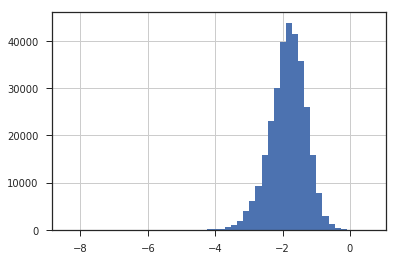

In [65]:
newDF['annuityIncomePct'].hist(bins = 50)

In [36]:
originalDF['AMT_ANNUITY'].count()

307499

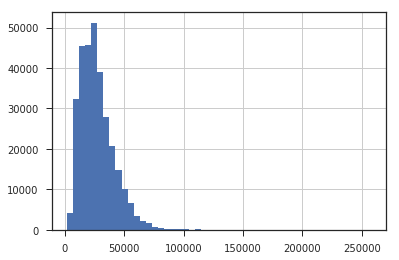

In [37]:
originalDF['AMT_ANNUITY'].hist(bins = 50)

In [38]:
newDF['CREDIT_INCOME_PERCENT'] = originalDF['AMT_CREDIT'] / originalDF['AMT_INCOME_TOTAL']
newDF['ANNUITY_INCOME_PERCENT'] = originalDF['AMT_ANNUITY'] / originalDF['AMT_INCOME_TOTAL']
newDF['CREDIT_TERM'] = originalDF['AMT_ANNUITY'] / originalDF['AMT_CREDIT']
newDF['DAYS_EMPLOYED_PERCENT'] = originalDF['DAYS_EMPLOYED'] / originalDF['DAYS_BIRTH']

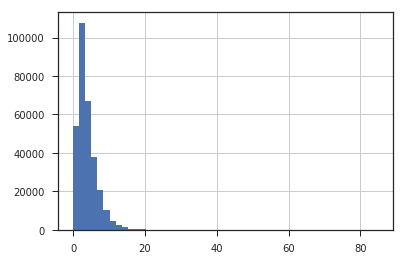

In [39]:
newDF['CREDIT_INCOME_PERCENT'].hist(bins = 50)

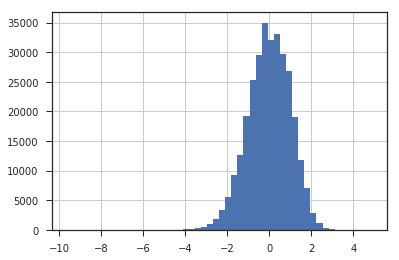

In [47]:
creditIncome = pd.Series(scale(np.log(newDF['CREDIT_INCOME_PERCENT'])), name = 'creditIncome')
creditIncome.hist(bins = 50)

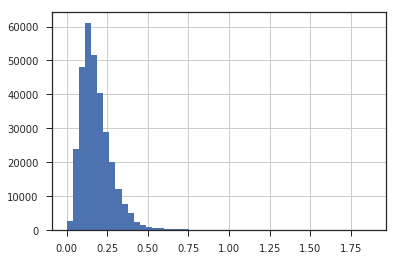

In [40]:
newDF['ANNUITY_INCOME_PERCENT'].hist(bins = 50)

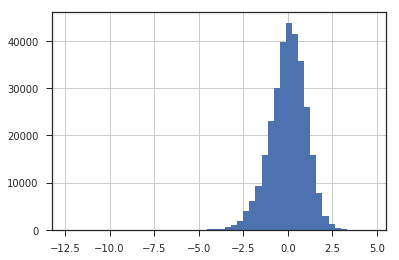

In [52]:
annuityIncome = pd.Series(scale(np.log(newDF['ANNUITY_INCOME_PERCENT'].fillna(newDF['ANNUITY_INCOME_PERCENT'].median()))), name = 'annuityIncome')
annuityIncome.hist(bins = 50)

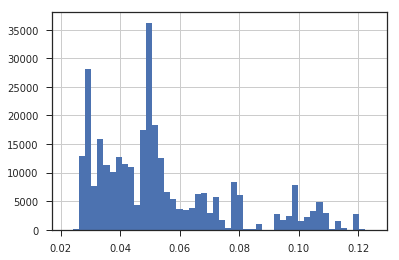

In [41]:
newDF['CREDIT_TERM'].hist(bins = 50)

In [43]:
newDF['DAYS_EMPLOYED_PERCENT'] = originalDF['DAYS_EMPLOYED']*(-1) / originalDF['DAYS_BIRTH']

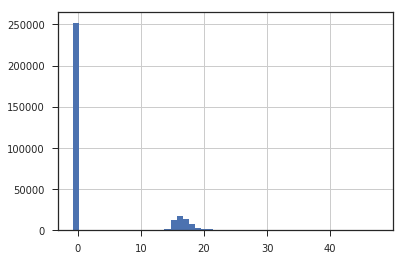

In [44]:
newDF['DAYS_EMPLOYED_PERCENT'].hist(bins = 50)

/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


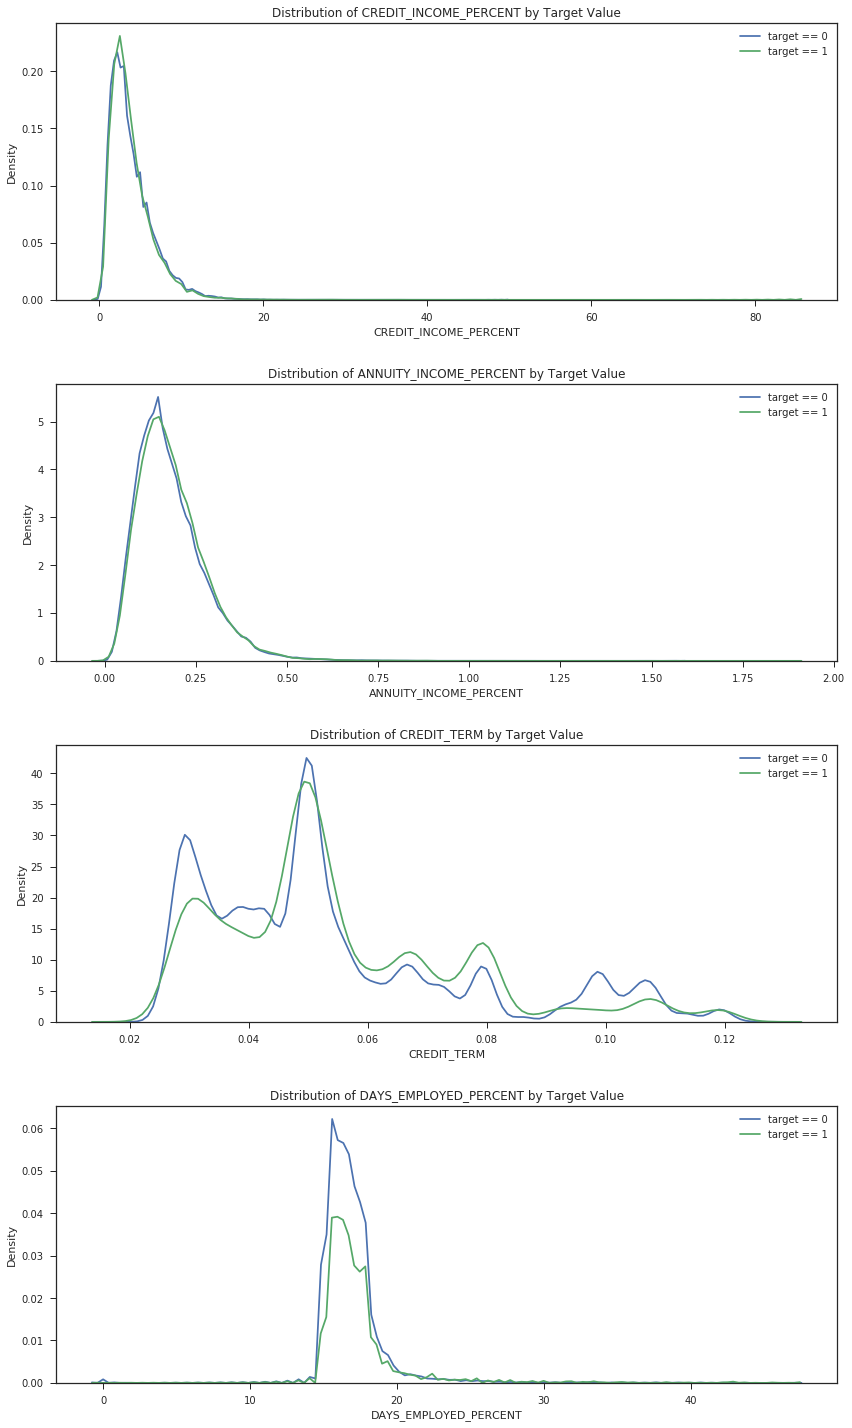

In [45]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(newDF.loc[newDF['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(newDF.loc[newDF['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)